In [ ]:
import os
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df='/content/gdrive/MyDrive/Dataset.zip'
df1=zipfile.ZipFile(df, 'r')
df1.extractall('/content/Dataset')

In [ ]:
os.listdir('/content/Dataset/Soil types')

['Yellow Soil', 'Cinder Soil', 'Peat Soil', 'Laterite Soil', 'Black Soil']

In [ ]:
train_black_dir=os.path.join('/content/Dataset/Soil types/Black Soil')

In [ ]:
train_cylinder_dir=os.path.join('/content/Dataset/Soil types/Cinder Soil')

In [ ]:
train_Laterite_dir=os.path.join('/content/Dataset/Soil types/Laterite Soil')

In [ ]:
train_Peat_dir=os.path.join('/content/Dataset/Soil types/Peat Soil')

In [ ]:
train_Yellow_dir=os.path.join('/content/Dataset/Soil types/Yellow Soil')

In [ ]:
train_black_names = os.listdir(train_black_dir)
print(train_black_names[:10])

['11.jpg', '15.jpg', '3.jpg', '30.jpg', '31.jpg', '29.jpg', '18.jpg', '26.jpg', '24.jpg', '4.jpg']


In [ ]:
train_cylinder_names = os.listdir(train_cylinder_dir)
print(train_cylinder_names[:10])

['11.jpg', '15.jpg', '3.jpg', '30.jpg', '29.jpg', '1.jpg', '18.jpg', '26.jpg', '24.jpg', '4.jpg']


In [ ]:
train_Laterite_names = os.listdir(train_Laterite_dir)
print(train_Laterite_names[:10])

['11.jpg', '15.jpg', '3.jpg', '30.jpg', '29.jpg', '1.jpg', '18.jpg', '26.jpg', '24.jpg', '4.jpg']


In [ ]:
train_peat_names = os.listdir(train_Peat_dir)
print(train_peat_names[:10])

['11.jpg', '15.jpg', '3.jpg', '30.jpg', '29.jpg', '1.jpg', '18.jpg', '26.jpg', '24.jpg', '4.jpg']


In [ ]:
train_yellow_names = os.listdir(train_Yellow_dir)
print(train_yellow_names[:10])

['11.jpg', '15.jpg', '3.jpg', '30.jpg', '29.jpg', '18.jpg', '26.jpg', '24.jpg', '4.jpg', '17.jpg']


In [ ]:
print('total training black images:', len(os.listdir(train_black_names)))
print('total training cylinder images:', len(os.listdir(train_cylinder_names)))
print('total training Laterite images:', len(os.listdir(train_Laterite_names)))
print('total training peat images:', len(os.listdir(train_peat_names)))
print('total training yellow images:', len(os.listdir(train_yellow_names)))

TypeError: ignored

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
nrows = 4
ncols = 4

In [ ]:
pic_index = 0

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

<Figure size 1152x1152 with 0 Axes>

In [ ]:
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [ ]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
image_size = 220
batch_size = 10


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [ ]:
model = tf.keras.models.Sequential([
    
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        '/content/Dataset/Soil types', 
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical')

Found 156 images belonging to 5 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape


In [ ]:
print (train_generator.class_indices)

{'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}


In [ ]:
total_sample = train_generator.n
n_epochs = 30

In [ ]:
history = model.fit(
        train_generator, 
        steps_per_epoch = int(total_sample/batch_size),  
        epochs = n_epochs,
        verbose = 1)

Epoch 1/30
15/15 [==============================] - 7s 437ms/step - loss: 0.2833 - acc: 0.8973
Epoch 2/30
15/15 [==============================] - 6s 437ms/step - loss: 0.2912 - acc: 0.9178
Epoch 3/30
15/15 [==============================] - 7s 441ms/step - loss: 0.2572 - acc: 0.9178
Epoch 4/30
15/15 [==============================] - 8s 560ms/step - loss: 0.5489 - acc: 0.8562
Epoch 5/30
15/15 [==============================] - 7s 437ms/step - loss: 0.1624 - acc: 0.9726
Epoch 6/30
15/15 [==============================] - 7s 444ms/step - loss: 0.3769 - acc: 0.8562
Epoch 7/30
15/15 [==============================] - 9s 601ms/step - loss: 0.3277 - acc: 0.9178
Epoch 8/30
15/15 [==============================] - 6s 429ms/step - loss: 0.2084 - acc: 0.9452
Epoch 9/30
15/15 [==============================] - 7s 435ms/step - loss: 0.2512 - acc: 0.9315
Epoch 10/30
15/15 [==============================] - 7s 440ms/step - loss: 0.1844 - acc: 0.9384
Epoch 11/30
15/15 [==============================

In [ ]:
model.save('/content/gdrive/MyDrive/soil_model.h5')

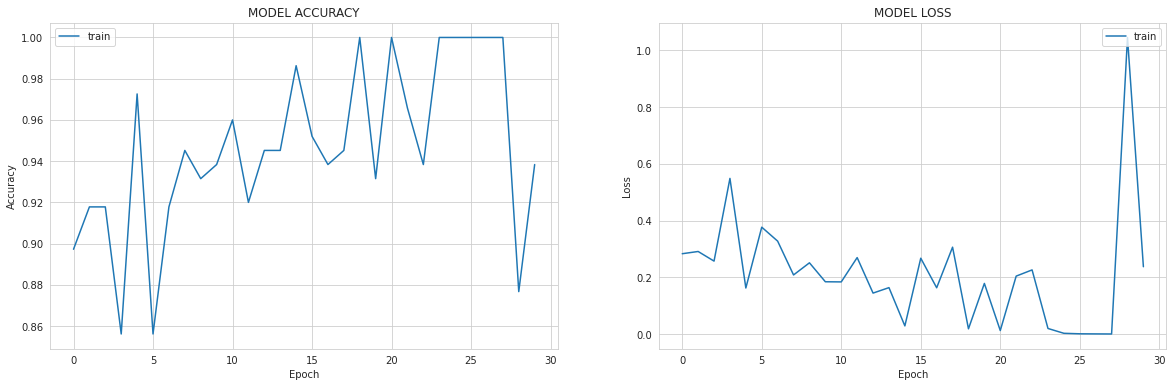

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
fig.set_size_inches(20,6)
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
fig.set_size_inches(20,6)
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
base_model=VGG16(input_shape=(220,220,3),     #Shaoe of our images
                 include_top=False,           #Leave out the last fully connected layer
                 weights='imagenet')

In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
from keras import layers

In [ ]:
#Flatten the output latyer to one dimension
x = layers.Flatten()(base_model.output)

#Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

#Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

#Add a final sigmoid layer for classification
x = layers.Dense(5, activation='softmax')(x)


In [ ]:
model=tf.keras.models.Model(base_model.input, x)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
history = model.fit(
        train_generator, 
        steps_per_epoch = int(total_sample/batch_size),  
        epochs = n_epochs,
        verbose = 1)

Epoch 1/30
15/15 [==============================] - 1s 61ms/step - loss: 0.0383 - acc: 0.9795
Epoch 2/30
15/15 [==============================] - 1s 59ms/step - loss: 0.1153 - acc: 0.9658
Epoch 3/30
15/15 [==============================] - 1s 59ms/step - loss: 0.1437 - acc: 0.9589
Epoch 4/30
15/15 [==============================] - 1s 58ms/step - loss: 0.0714 - acc: 0.9795
Epoch 5/30
15/15 [==============================] - 1s 58ms/step - loss: 0.0317 - acc: 0.9795
Epoch 6/30
15/15 [==============================] - 1s 59ms/step - loss: 0.0682 - acc: 0.9867
Epoch 7/30
15/15 [==============================] - 1s 59ms/step - loss: 0.1206 - acc: 0.9726
Epoch 8/30
15/15 [==============================] - 1s 58ms/step - loss: 0.1093 - acc: 0.9658
Epoch 9/30
15/15 [==============================] - 1s 58ms/step - loss: 0.0231 - acc: 0.9932
Epoch 10/30
15/15 [==============================] - 1s 58ms/step - loss: 0.2125 - acc: 0.9521
Epoch 11/30
15/15 [==============================] - 1s 59m

In [ ]:
model.save('/content/gdrive/MyDrive/vgg_model_soil.h5')

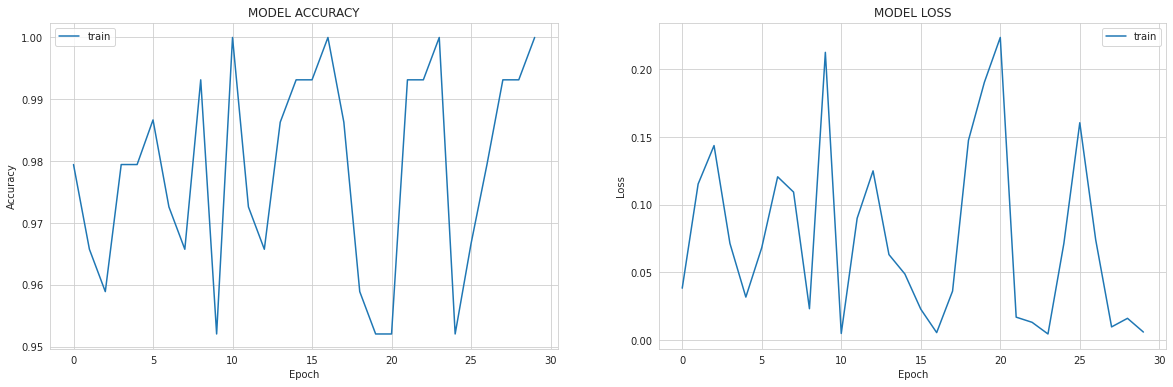

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
fig.set_size_inches(20,6)
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
fig.set_size_inches(20,6)
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
plt.show()